# Assignment 01: Supervised learning, Linear models, and Loss functions
## Grade: /20 Mark(s)


In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function. At the end you will compare them to the implementation to the implementation of `statsmodels`.  

In this assignment, we have provided hints and partial solutions. Your job is to fill in the missing components.

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [1]:
#It's dangerous to go alone.  Take these!
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Question 1:  /1 Mark(s)


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and it's tail length by plotting a scatter plot of the `age` and `tailL` columns. You might want to add an `alpha` in case some data are overlapping. 

Text(0, 0.5, 'Tail')

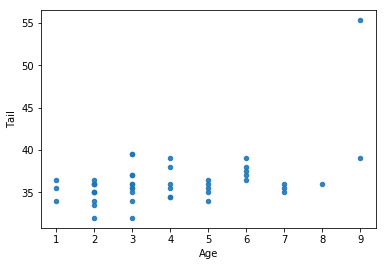

In [2]:
possum_data = pd.read_csv("possum.csv") # Load in the data using pandas

# Make a scatter plot of Age vs. Tail Length
# Use: possum_data.plot.scatter(x='',y='',alpha=0.5)....

ax = possum_data.plot.scatter(x='age',y='tailL',alpha=0.9)

# Label the x- and y-axis
# Use: ax.set_xlabel('STRING')

ax.set_xlabel('Age')
ax.set_ylabel('Tail')


### Question 2: /1 Mark(s)

Recall that the linear model, we obtain predictions by computing 

$$ \mathbf{y} = \mathbf{X} \beta $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\beta$ are coefficients, and $\mathbf{y}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [3]:
def linearModelPredict(b,X):

    # Compute the matrix product between b and X as shown above
    # Return the result, which should be a vector (np-array)
    yp = np.dot(X,b)
    
    return yp



### Question 3: /3 Mark(s)

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

In [4]:
def linearModelLossRSS(b,X,y):
    # Get the model prediction 
    predY = linearModelPredict(b,X)
    # calculate the residuals 
    res = np.subtract(y, predY)
    # Calculate the residual sums of squares 
    residual_sum_of_squares = np.sum(res**2)
    # Calculate the gradient 
    # gradient = -2(X^t)r
    gradient = -2 * np.dot(np.transpose(X),res)
    # Return RSS and gradient 
    return (residual_sum_of_squares, gradient)

### Question 4:  /3 Mark(s)

Now that you've implemented a loss function in question 3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss.

In [5]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    # Initialize the coefficient vector beta
    # HINT: use np.zeros(rows,cols) to get a 2-d array of zeros 
    # Use X.shape to get the correct dimensions 
    # Number of columns of X should be the length of the beta-vector 
    
    betas = np.zeros((X.shape[1],1))
    
    # Use scipy so.miminize to optimize the loss
    
    RESULTS = so.minimize(linearModelLossRSS,betas,args=(X, y),jac=True)
    
    # Get the betas from the RESULTS  
    estimated_betas = RESULTS.x
    
    
    # Calculate the residuals (OF WHAT???)
    res = np.subtract(y, linearModelPredict(estimated_betas,X))
    
    # Calculate the  total sum of squares
    TSS = np.sum((y - np.average(y))**2)
    
    # Caluculate the residual sums of squares (you can also use linearModelLossRSS)
    RSS, gradient = linearModelLossRSS(estimated_betas,X,y)
    
    R2 = 1 - (RSS/TSS) # Compute the value for r squared
    # Return estimated betas and the R2 
    return (estimated_betas,R2)

### Question 5: /3 Mark(s)

Use the above functions to fit your model. Use your model to make predictions along a grid of equally spaced possum ages.  Then plot the real data as a scatter plot and add the predicted values as a line. The last line of code  will print the R squared value on the plot.



Text(0.25, 0.8, 'R Squared: 0.22')

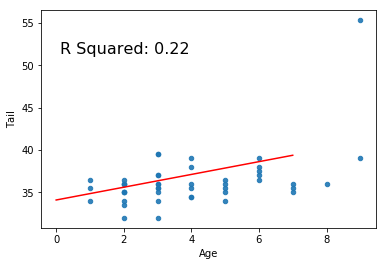

In [6]:
# Build the design matrix X.
# by concatinating a column of ones (use np.ones)
# with the values of age
# For column concatination you can use np.c_
y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]

# Then Fit the model using linearModelFit
betas, R2 = linearModelFit(X,y)

# Initialize an evenly spaced vector of ages ranging from 1 to 9.
age_grid = np.arange(1,9)

# Build a new design matrix with a column of np.ones of the right size 
# as the first column and age_grid as the second column  
Xn = np.column_stack((np.ones(age_grid.shape[0], dtype=int),age_grid))

# Compute the predictions for the grid of ages.
yn = linearModelPredict(betas,Xn)

# Make a scatter plot of the real data 
# Set the x-axis and y-axis labels correctly 
ax = possum_data.plot.scatter(x='age',y='tailL',alpha=0.9)

# Label the x- and y-axis
# Use: ax.set_xlabel('STRING')

ax.set_xlabel('Age')
ax.set_ylabel('Tail')

# Add the predicted values plotted as a red line 
# ax.plot
ax.plot(yn,color = 'r')



# Annotate your graph using ax.annotate to 
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.25, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)


___

### Question 6:  /3 Mark(s)

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.



In [7]:
def linearModelLossLAD(b,X,y):
    #  Get the model prediction 
    predY = linearModelPredict(b,X)
    # Calculate the residuals 
    res = np.subtract(y, predY)
    # Calculate the sign of the residuals (using np.sign)
    sres = np.sign(res)
    # Caluclate the sum of the absolute deviation 
    sum_abs_dev = np.sum(np.absolute(res))
    # Compute the gradient 
    grad =  -np.sum(sres)
    # Return loss(sum_abs_dev) and gradient
    # ...
    
    return sum_abs_dev, grad

### Question 7: /3 Mark(s)


Use the above functions to fit your LAD model. As for Question 5, use your model to make predictions along a grid of equally spaced possum ages.  Provide a scatter plot of the data, and add the model fit as a red line. Don't forget x-labels and y-labels. Compute the R2 value of the fit and add it to the figure using ax.annotate (see Question 5). 


Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimiers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.

Text(0.25, 0.8, 'R Squared: 0.09')

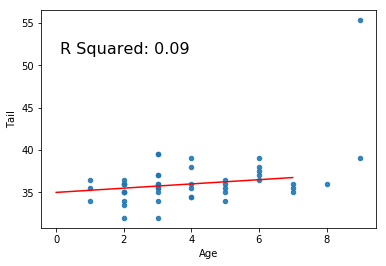

In [8]:
def linearModelFitLAD(X,y,lossfcn = linearModelLossLAD):
    # Initialize the coefficient vector beta
    # HINT: use np.zeros(rows,cols) to get a 2-d array of zeros 
    # Use X.shape to get the correct dimensions 
    # Number of columns of X should be the length of the beta-vector 
    
    betas = np.zeros((X.shape[1],1))
    
    # Use scipy so.miminize to optimize the loss
    
    RESULTS = so.minimize(linearModelLossLAD,betas,args=(X, y),jac=True, method="Powell")
    
    # Get the betas from the RESULTS  
    estimated_betas = RESULTS.x
    
    
    # Calculate the residuals (OF WHAT???)
    res = np.subtract(y, linearModelPredict(estimated_betas,X))
    
    # Calculate the  total sum of squares
    TSS = np.sum((y - np.average(y))**2)
    
    # Caluculate the residual sums of squares (you can also use linearModelLossRSS)
    RSS, gradient = linearModelLossRSS(estimated_betas,X,y)
    
    R2 = 1 - (RSS/TSS) # Compute the value for r squared
    # Return estimated betas and the R2 
    return (estimated_betas,R2) 


# Build the design matrix X.
# by concatinating a column of ones (use np.ones)
# with the values of age
# For column concatination you can use np.c_
y = possum_data.tailL.values
age = possum_data.age.values
N = age.size
X = np.c_[np.ones(N), age]

# Then Fit the model using linearModelFit
betas, R2 = linearModelFitLAD(X,y)

# Initialize an evenly spaced vector of ages ranging from 1 to 9.
age_grid = np.arange(1,9)

# Build a new design matrix with a column of np.ones of the right size 
# as the first column and age_grid as the second column  
Xn = np.column_stack((np.ones(age_grid.shape[0], dtype=int),age_grid))

# Compute the predictions for the grid of ages.
yn = linearModelPredict(betas,Xn)

# Make a scatter plot of the real data 
# Set the x-axis and y-axis labels correctly 
ax = possum_data.plot.scatter(x='age',y='tailL',alpha=0.9)

# Label the x- and y-axis
# Use: ax.set_xlabel('STRING')

ax.set_xlabel('Age')
ax.set_ylabel('Tail')

# Add the predicted values plotted as a red line 
# ax.plot
ax.plot(yn,color = 'r')


# Annotate your graph using ax.annotate to 
ax.annotate('R Squared: {R2}'.format(R2=R2.round(2)), 
            xy=(0.25, 0.8), 
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)


### Question 8: /3 Mark(s)

Fit both an OLS model and a LAD model with `statsmodels`.  In no more than two sentences, comment on the rsquared values from `statsmodels` and the rsquared values from your models. Are they similar?

`COMMENT:` It appears that the OLS models do have the same r-squared values. The R-squared models are hard to compare when looking at the r-squared values since I am getting a NaN value for the model from `statsmodels` but when plotted both models look similar.

OLS rsquared:  0.22
LAD rsquared:  nan


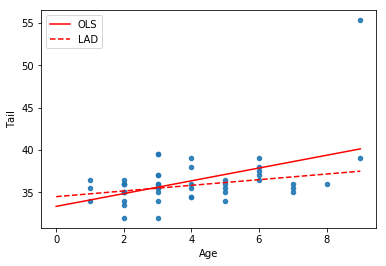

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels


ols_fit = sm.OLS(y,X).fit() # Fit an OLS Model with statsmodels
lad_fit = statsmodels.regression.quantile_regression.QuantReg(y,X).fit(q=0.5) # Fit a LAD Model with statsmodels

print('OLS rsquared: ', ols_fit.rsquared.round(2))
print('LAD rsquared: ', lad_fit.rsquared) # Getting a nan is fine here, don't worry.


age = np.linspace(0,9,1001)

# Build a new design matrix with a column of np.ones of the right size 
# as the first column and age_grid as the second column  


y_ols = ols_fit.predict(sm.add_constant(age)) # Make predictions with your ols_fit
y_lad = lad_fit.predict(sm.add_constant(age)) # Make predictions with your lad_fit


# Provide a scatter plot of the data and add the OLS and LAD fit as a solid red 
# and dashed red line (use linestyle='dashed')
# Add a legend to your graph (ax.legend)

ax = possum_data.plot.scatter(x='age',y='tailL',alpha=0.9)

# Label the x- and y-axis
ax.set_xlabel('Age')
ax.set_ylabel('Tail')


# Add the predicted values plotted as a red lines
ax.plot(age, y_ols,color = 'r', label="OLS")
ax.plot(age, y_lad,color = 'r',linestyle='dashed', label="LAD")

# Add Legend
ax.legend()

# Follow These Steps...

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.